# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
dataset = pd.read_excel('RP_End_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   End time           1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
y = dataset['End time']
X = dataset.drop(['End time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [8]:
ann = tf.keras.models.Sequential()

In [9]:
ann.add(tf.keras.layers.Dense(units=75,
                              input_shape=(X_train.shape[1],),
                              activation='softplus'))
ann.add(tf.keras.layers.Dense(units=55,
                              activation='softplus'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                300       
                                                                 
 dense_1 (Dense)             (None, 55)                4180      
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                                 
Total params: 4,536
Trainable params: 4,536
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [13]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [14]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 1s 12ms/step - loss: 1078.7045 - mae: 22.6756 - val_loss: 162.8741 - val_mae: 10.2669
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 156.6713 - mae: 9.3982 - val_loss: 105.8242 - val_mae: 6.8260
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 121.9553 - mae: 8.1055 - val_loss: 148.3931 - val_mae: 9.8915
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 119.2297 - mae: 7.9345 - val_loss: 96.4013 - val_mae: 6.4273
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 103.6537 - mae: 7.2201 - val_loss: 101.2851 - val_mae: 6.8228
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 109.9763 - mae: 7.4206 - val_loss: 103.9570 - val_mae: 7.6278
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 102.1398 - mae: 7.0469 - val_loss: 94.2132 - val_mae: 7.0796
Epoch 8/500
41/41 [==============================] - 

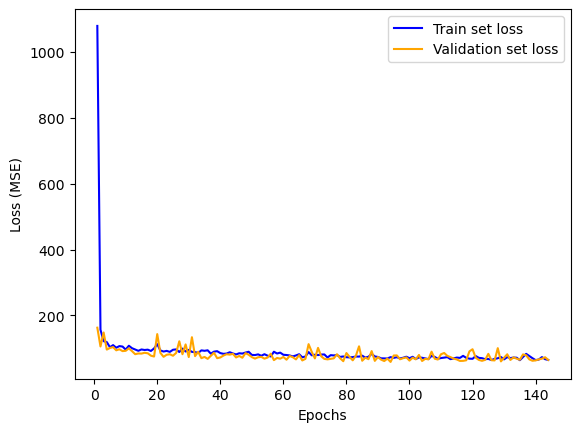

In [15]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('End_ANN2_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

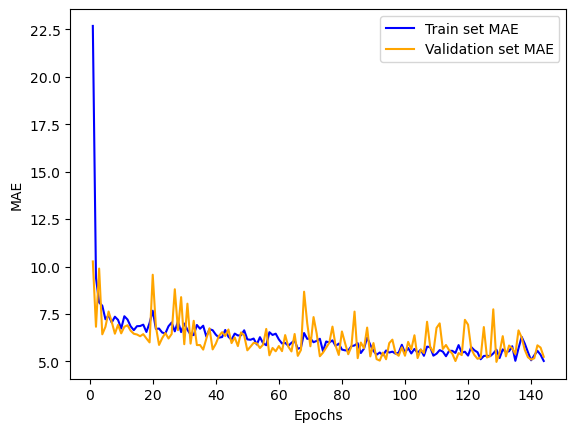

In [16]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('End_ANN2_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [28]:
ann.save('End_ANN2')

INFO:tensorflow:Assets written to: End_ANN2\assets


# Part 4 - Make predictions

In [ ]:
ann = load_model('End_ANN1')

9/9 [==============================] - 0s 3ms/step


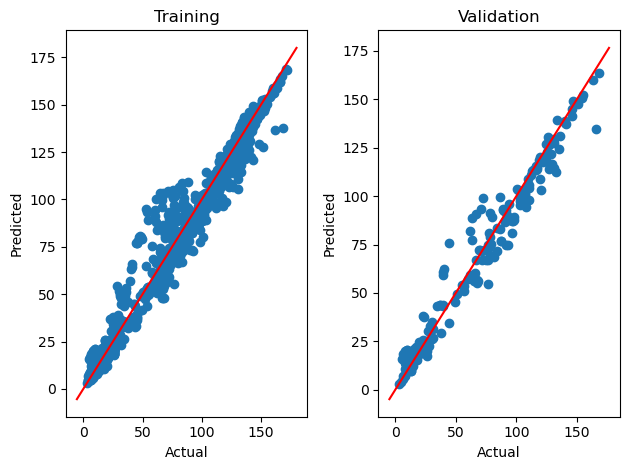

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
#plt.show()

plt.savefig('End_ANN2_1.png', dpi = 300, bbox_inches = 'tight')

In [18]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 1ms/step
[[ 80.66  85.17]
 [ 16.14  18.75]
 [ 91.73  53.98]
 [121.22 122.31]
 [ 16.26  12.83]
 [ 15.81  13.  ]
 [ 18.91  26.01]
 [109.91 113.4 ]
 [ 94.48 100.31]
 [ 21.42  20.  ]
 [ 97.55  60.05]
 [ 96.17 101.74]
 [112.08 113.29]
 [ 48.46  60.2 ]
 [ 14.61  12.65]
 [ 44.73  37.48]
 [112.92 126.39]
 [ 27.45  31.78]
 [ 14.69  12.7 ]
 [ 24.99  26.  ]
 [143.13 144.43]
 [ 20.31  18.  ]
 [ 16.67  17.57]
 [ 17.2   26.  ]
 [ 15.5    5.59]
 [103.82 100.82]
 [ 48.41  51.7 ]
 [ 22.77  20.31]
 [ 14.91  10.77]
 [ 82.55  81.92]
 [ 27.07  29.51]
 [ 73.68  75.12]
 [105.7  106.18]
 [ 18.93  20.  ]
 [152.43 152.76]
 [166.55 169.95]
 [ 12.3   10.58]
 [ 81.62  94.8 ]
 [ 99.72 100.76]
 [ 63.45  70.35]
 [103.87 101.5 ]
 [ 55.77  62.76]
 [148.34 142.91]
 [141.88 139.77]
 [ 23.45  19.44]
 [ 81.8   77.59]
 [142.25 145.59]
 [ 19.59  20.  ]
 [  6.78   6.75]
 [ 95.38 105.15]
 [147.96 148.09]
 [119.19 134.8 ]
 [ 13.63  13.  ]
 [ 86.22  99.14]
 [ 67.75  75.44]
 [165.65 167.6

Text(0, 0.5, 'Predicted data')

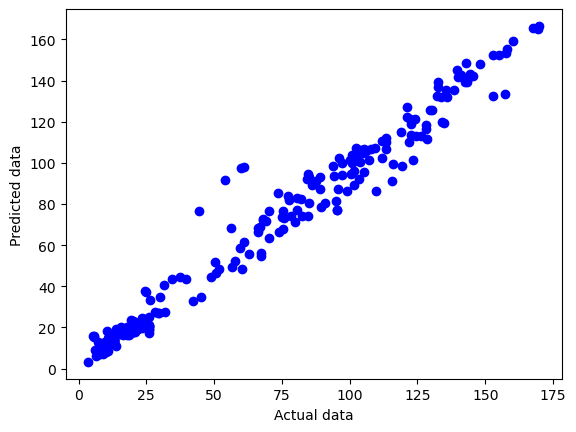

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.13],[0,0.13], color = "red")
#plt.axis ([0,0.13,0,0.13])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

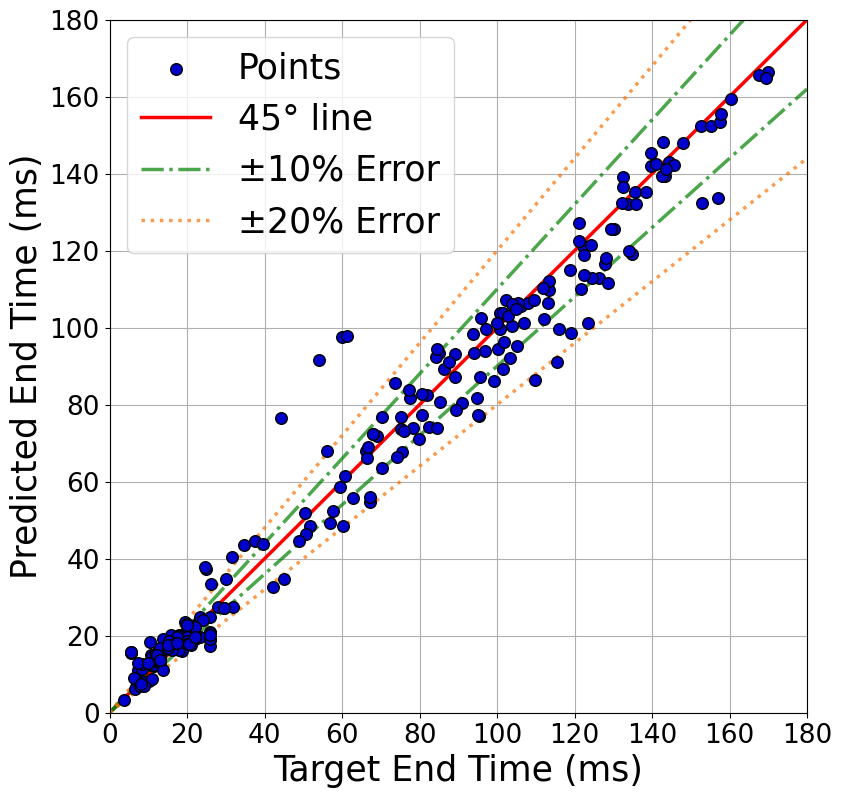

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 0
u_l = 180

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted End Time (ms)',fontsize = 25)
plt.xlabel('Target End Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
#plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
#plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('End_ANN2.png', dpi = 300, bbox_inches = 'tight')

In [21]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 1ms/step
5.1889319334520385
5.036889534930374


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9735927752420285


In [23]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9695812141682003


In [24]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 34.98%
Within 10% margin 55.89%
Within 20% margin 82.51%
Out of 20% margin 17.49%


In [25]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9732869000517816


In [26]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

7.87548426525372

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5.036889534930374